In [ ]:
import zipfile
import numpy as np
from PIL import Image
from keras.models import Sequential
import tensorflow as tf

# Open the zipped folder
with zipfile.ZipFile('/content/drive/MyDrive/Classroom/Machine Learning (CSL7620) 22-23 Sem II/GurNum-20230429T112325Z-001.zip', 'r') as zip_ref:
    # Extract the training data
    x_train = []
    y_train = []
    for i in range(10):
        folder_name = f'train/{i}/'
        for file_name in zip_ref.namelist():
            if folder_name in file_name:
                with zip_ref.open(file_name) as file:
                    img = Image.open(file).convert('L')
                    img_arr = np.array(img)
                    x_train.append(img_arr)
                    y_train.append(i)
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    # Extract the testing data
    x_test = []
    y_test = []
    for i in range(10):
        folder_name = f'val/{i}/'
        for file_name in zip_ref.namelist():
            if folder_name in file_name:
                with zip_ref.open(file_name) as file:
                    img = Image.open(file).convert('L')
                    img_arr = np.array(img)
                    x_test.append(img_arr)
                    y_test.append(i)
    x_test = np.array(x_test)
    y_test = np.array(y_test)

# Normalize the features
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert the labels to one-hot encoded vectors
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)


In [ ]:

y_train

<tf.Tensor: shape=(1000, 10), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
x_train

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 0., 1., 1.],
        [1., 1., 1., ..., 0., 0., 1.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

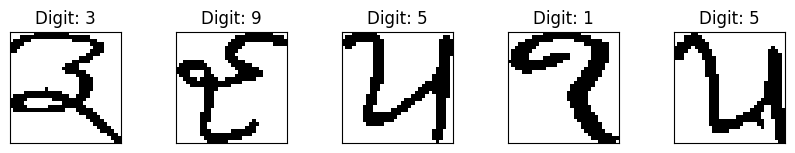

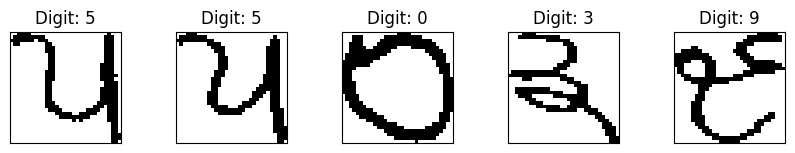

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot a random sample of images
def plot_images(images, labels):
    fig, axes = plt.subplots(1, 5, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    for i, ax in enumerate(axes.flat):
        idx = np.random.randint(0, len(images))
        ax.imshow(images[idx], cmap='gray')
        ax.set_title(f'Digit: {np.argmax(labels[idx])}')
        ax.set_xticks([])
        ax.set_yticks([])
        
# Plot a random sample of five images from the training data
plot_images(x_train, y_train)

# Plot a random sample of five images from the testing data
plot_images(x_test, y_test)

# Show the plots
plt.show()



In [ ]:
# import zipfile

# with zipfile.ZipFile('/content/drive/MyDrive/Classroom/Machine Learning (CSL7620) 22-23 Sem II/GurNum-20230429T112325Z-001.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/')


In [ ]:
import zipfile
import numpy as np
from PIL import Image
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Open the zipped folder
with zipfile.ZipFile('/content/drive/MyDrive/Classroom/Machine Learning (CSL7620) 22-23 Sem II/GurNum-20230429T112325Z-001.zip', 'r') as zip_ref:
    # Extract the training data
    x_train = []
    y_train = []
    for i in range(10):
        folder_name = f'train/{i}/'
        for file_name in zip_ref.namelist():
            if folder_name in file_name:
                with zip_ref.open(file_name) as file:
                    img = Image.open(file).convert('L')
                    img_arr = np.array(img)
                    x_train.append(img_arr)
                    y_train.append(i)
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    # Extract the testing data
    x_test = []
    y_test = []
    for i in range(10):
        folder_name = f'val/{i}/'
        for file_name in zip_ref.namelist():
            if folder_name in file_name:
                with zip_ref.open(file_name) as file:
                    img = Image.open(file).convert('L')
                    img_arr = np.array(img)
                    x_test.append(img_arr)
                    y_test.append(i)
    x_test = np.array(x_test)
    y_test = np.array(y_test)

# Normalize the features
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert the labels to one-hot encoded vectors
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# Data augmentation
datagen_train = ImageDataGenerator(
    rotation_range=20, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True
)
def build_model1(optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32))) # Add a Flatten layer to flatten the input images
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
    return model

# # Define the model
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

# Compile the model
# model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])


In [ ]:
optimizers = ['Adam', 'RMSprop', 'SGD']
accuracies = {}

for optimizer in optimizers:
    print(f'Training model using {optimizer} optimizer')
    model = build_model1(optimizer)
    hist =model.fit(datagen_train.flow(x_train.reshape(-1, 32, 32, 1), y_train, batch_size=batch_size),
          steps_per_epoch=len(x_train) // batch_size, epochs=32,
          validation_data=(x_test.reshape(-1, 32, 32, 1), y_test))
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    accuracies[optimizer] = test_acc
    print(f'Test accuracy for {optimizer} optimizer: {test_acc:.4f}')

Training model using Adagrad optimizer
Epoch 1/32
15/15 [==============================] - 3s 64ms/step - loss: 2.3621 - accuracy: 0.0887 - val_loss: 2.3250 - val_accuracy: 0.1180
Epoch 2/32
15/15 [==============================] - 1s 46ms/step - loss: 2.3173 - accuracy: 0.1197 - val_loss: 2.2893 - val_accuracy: 0.1348
Epoch 3/32
15/15 [==============================] - 1s 38ms/step - loss: 2.2778 - accuracy: 0.1357 - val_loss: 2.2632 - val_accuracy: 0.1629
Epoch 4/32
15/15 [==============================] - 0s 29ms/step - loss: 2.2731 - accuracy: 0.1357 - val_loss: 2.2411 - val_accuracy: 0.1461
Epoch 5/32
15/15 [==============================] - 0s 29ms/step - loss: 2.2311 - accuracy: 0.1813 - val_loss: 2.2152 - val_accuracy: 0.1685
Epoch 6/32
15/15 [==============================] - 0s 30ms/step - loss: 2.2085 - accuracy: 0.1806 - val_loss: 2.1842 - val_accuracy: 0.1854
Epoch 7/32
15/15 [==============================] - 0s 29ms/step - loss: 2.1851 - accuracy: 0.1944 - val_loss: 2.15

In [ ]:
model.save("GurNum.h5")